In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sub768 = pd.read_csv('20200721-768-EB7-3F-Ensemble-submission.csv')
sub768.head()

,image_name,target
0,ISIC_0052060,0.023440
1,ISIC_0052349,0.021552
2,ISIC_0058510,0.024231
3,ISIC_0073313,0.026245
4,ISIC_0073502,0.051212


In [3]:
sub512 = pd.read_csv('submission-512-EB6-3F.csv')
sub512.head()

,image_name,target
0,ISIC_0052060,0.027555
1,ISIC_0052349,0.022967
2,ISIC_0058510,0.027024
3,ISIC_0073313,0.028699
4,ISIC_0073502,0.029710


In [4]:
sub_data = pd.read_csv('20200708-Data-TF-IO-EB3.csv')
sub_data.head()

,image_name,target
0,ISIC_0052060,6.476617e-05
1,ISIC_0052349,3.893586e-05
2,ISIC_0058510,2.258713e-08
3,ISIC_0073313,4.203723e-07
4,ISIC_0073502,1.682541e-02


In [5]:
arr768 = sub768.target.to_numpy()
arr768

array([0.02343996, 0.02155239, 0.0242314 , ..., 0.05088273, 0.02330121,
       0.12764967])

In [6]:
arr512 = sub512.target.to_numpy()
arr512

array([0.02755478, 0.02296718, 0.02702382, ..., 0.09233765, 0.0286266 ,
       0.10441809])

In [7]:
arr_sub_data = sub_data.target.to_numpy()
arr_sub_data

array([6.4766165e-05, 3.8935865e-05, 2.2587127e-08, ..., 2.2722620e-02,
       1.4993560e-05, 2.2048576e-02])

In [8]:
ct_ensemble = len(arr768)
ct_ensemble

10982

In [9]:
ensemble = np.zeros((ct_ensemble,1))

In [10]:
wght768 = 0.50
ensemble[:,0] += np.mean(arr768.reshape((ct_ensemble,1),order='F'),axis=1) * wght768
ensemble

array([[0.01171998],
       [0.0107762 ],
       [0.0121157 ],
       ...,
       [0.02544137],
       [0.0116506 ],
       [0.06382483]])

In [11]:
wght512 = 0.50
ensemble[:,0] += np.mean(arr512.reshape((ct_ensemble,1),order='F'),axis=1) * wght512
ensemble

array([[0.02549737],
       [0.02225979],
       [0.02562761],
       ...,
       [0.07161019],
       [0.0259639 ],
       [0.11603388]])

In [12]:
wght_data = 0.0
ensemble[:,0] += np.mean(arr_sub_data.reshape((ct_ensemble,1),order='F'),axis=1) * wght_data
ensemble

array([[0.02549737],
       [0.02225979],
       [0.02562761],
       ...,
       [0.07161019],
       [0.0259639 ],
       [0.11603388]])

In [13]:
# Double Check
wght768+wght512+wght_data

1.0

In [14]:
enseble_image_names = sub768.image_name.to_numpy()
enseble_image_names

array(['ISIC_0052060', 'ISIC_0052349', 'ISIC_0058510', ...,
       'ISIC_9997917', 'ISIC_9998234', 'ISIC_9999302'], dtype=object)

In [17]:
submission = pd.DataFrame(dict(image_name=enseble_image_names, target=ensemble[:,0]))
submission = submission.sort_values('image_name') 
submission.to_csv('20200721-3F-512-EB6-3F-768-EB7-Ensemble.csv', index=False)
submission.head()

,image_name,target
0,ISIC_0052060,0.025497
1,ISIC_0052349,0.022260
2,ISIC_0058510,0.025628
3,ISIC_0073313,0.027472
4,ISIC_0073502,0.040461


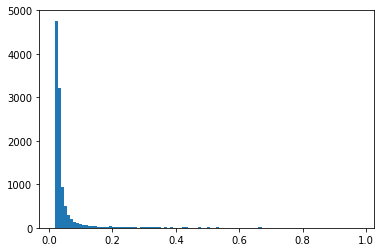

In [18]:
plt.hist(submission.target,bins=100)
plt.show()